# Name: Sarmad Hassan

## The Sparks Foundation: Data Science and Business Analytics Internship

### Task 6: Prediction using Decision Tree Algorithm

● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Import Libraries

In [177]:
# Install required libraries
!pip install pydotplus
!pip install graphviz

In [178]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt

### Import Dataset

In [179]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [180]:
df = df.drop(columns = "Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Analysis

In [181]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [182]:
# Check Null Values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [183]:
# Statistical Analysis
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Decision Tree

In [184]:
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

### Train Test Split

In [185]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 3)

### Size

In [186]:
# Shape of x_train and y_train
print(x_train.shape)
print(y_train.shape)

(90, 4)
(90,)


In [187]:
# Shape of x_test and y_test
print(x_test.shape)
print(y_test.shape)

(60, 4)
(60,)


### Modeling

In [188]:
Tree_array = []
for x in range(1, 30):
    Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = x)
    Tree.fit(x_train, y_train)
    yhat = Tree.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    Tree_array.append(accuracy)
np.array(Tree_array)

array([0.66666667, 0.93333333, 0.95      , 0.95      , 0.93333333,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.93333333, 0.95      , 0.96666667, 0.93333333, 0.95      ,
       0.96666667, 0.93333333, 0.95      , 0.96666667, 0.96666667,
       0.95      , 0.96666667, 0.96666667, 0.95      , 0.93333333,
       0.96666667, 0.95      , 0.95      , 0.95      ])

In [189]:
best_depth = Tree_array.index(max(Tree_array))
print("Best Depth index = " + str(best_depth))
print("Best Depth Accuracy = " + str(Tree_array[best_depth]))

Best Depth index = 5
Best Depth Accuracy = 0.9666666666666667


In [190]:
# Decision Tree Object Creation
Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 8)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [191]:
Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

### Prediction

In [192]:
xtest_predict = Tree.predict(x_test)
xtest_predict[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [193]:
pd.DataFrame({"Actual": y_test, "Predicted": xtest_predict}).head()

,Actual,Predicted
47,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
31,Iris-setosa,Iris-setosa
25,Iris-setosa,Iris-setosa
15,Iris-setosa,Iris-setosa


### Evaluation

In [194]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, xtest_predict)
print(accuracy)

0.9333333333333333


### Decision Tree Graph

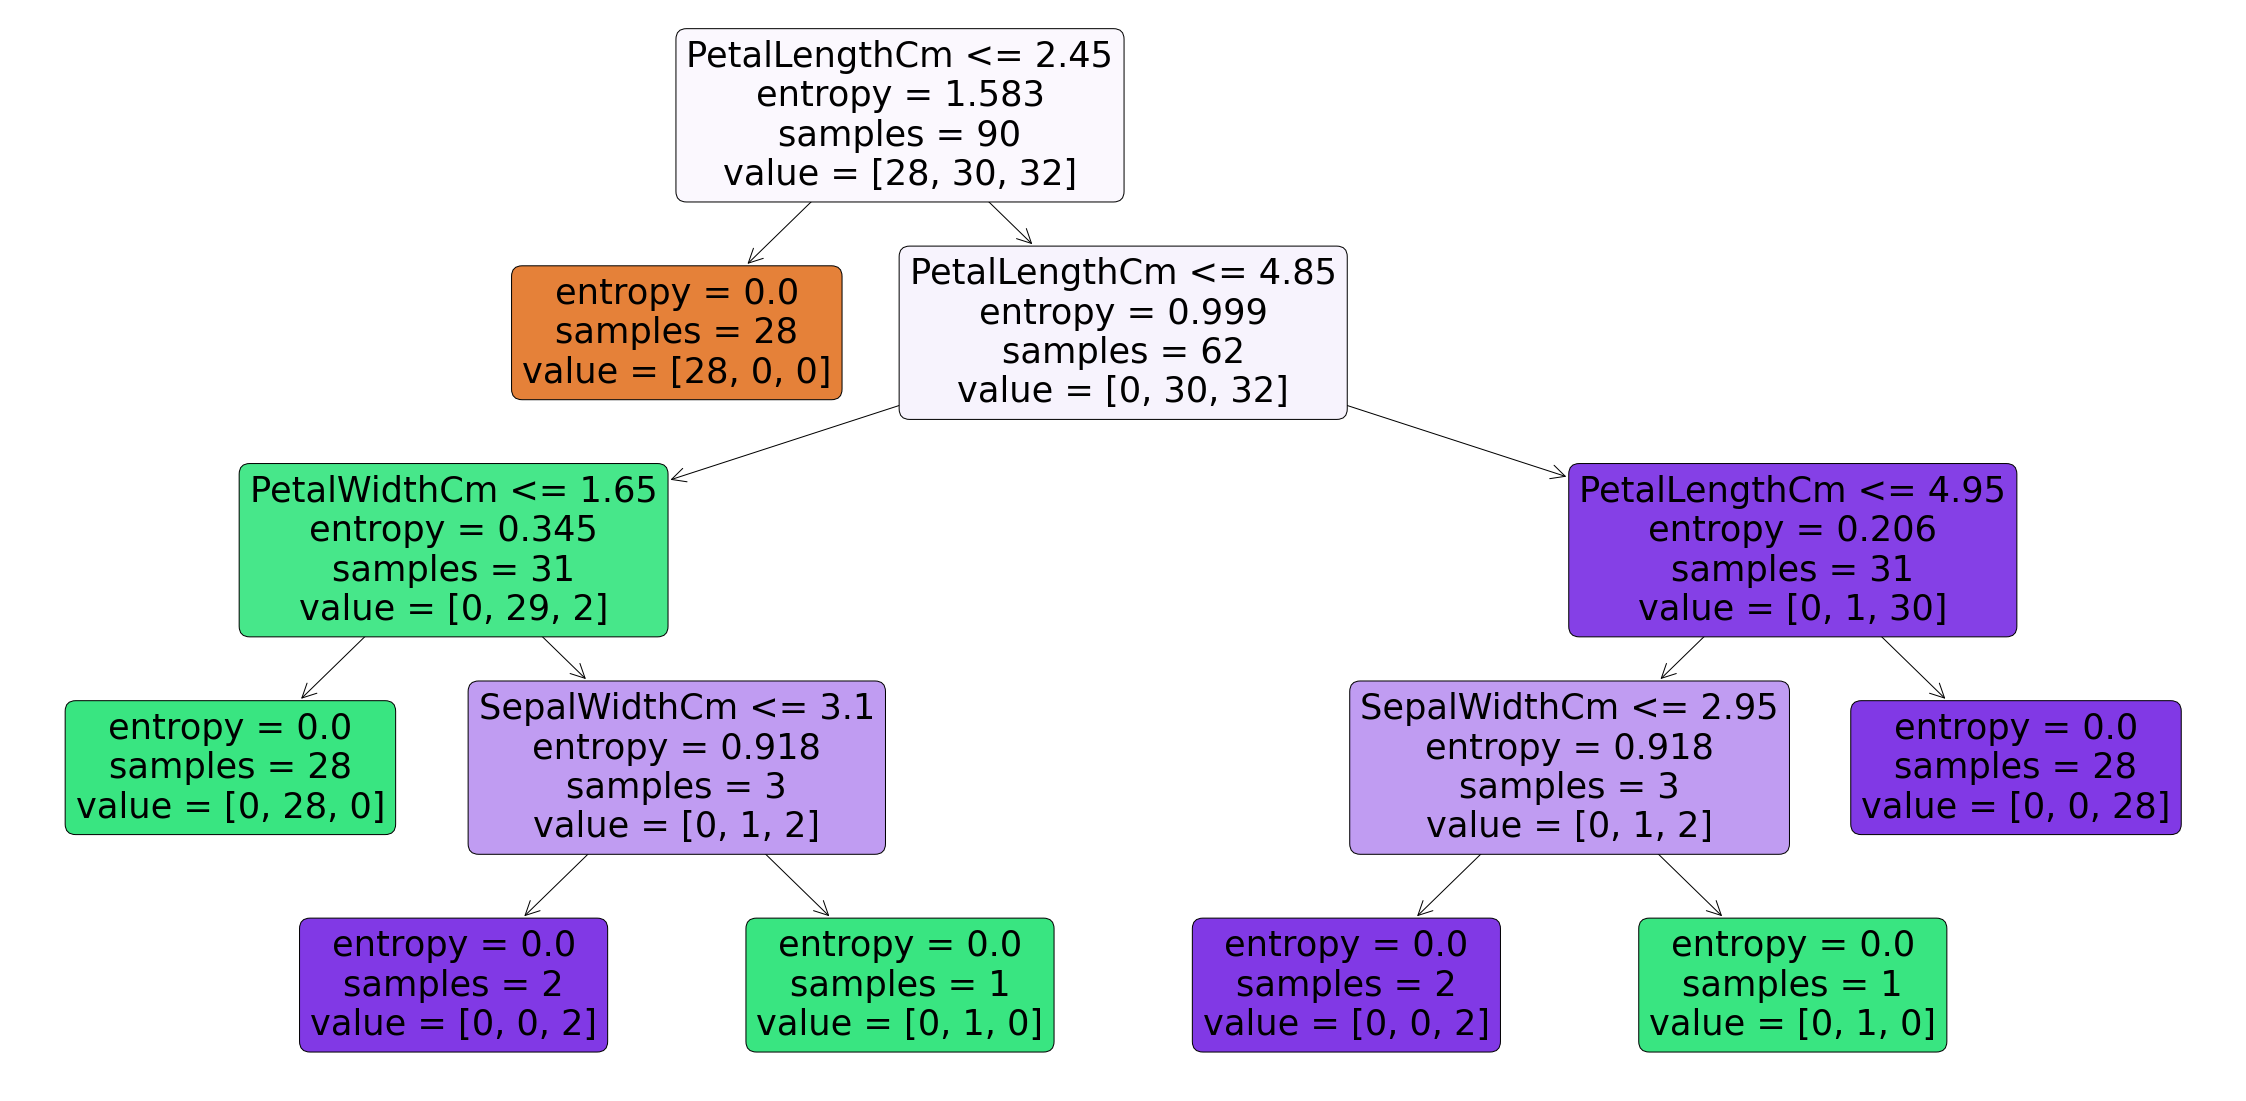

In [206]:
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(Tree, feature_names = X.columns, 
             filled=True, rounded = True)
plt.show()